In [420]:
import cv2
import numpy as np                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
from matplotlib import pyplot as plt

### Contour

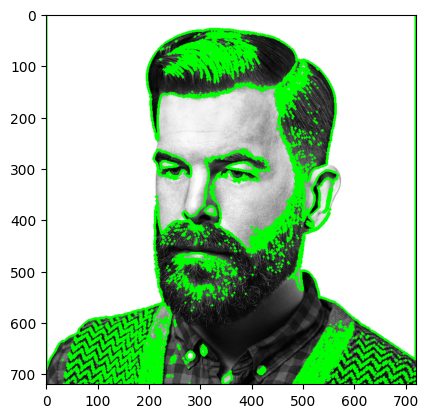

In [421]:
img = cv2.imread('img12.jpeg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

plt.imshow(img)

### Image Segmentation

In [422]:
img = cv2.imread('coin.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

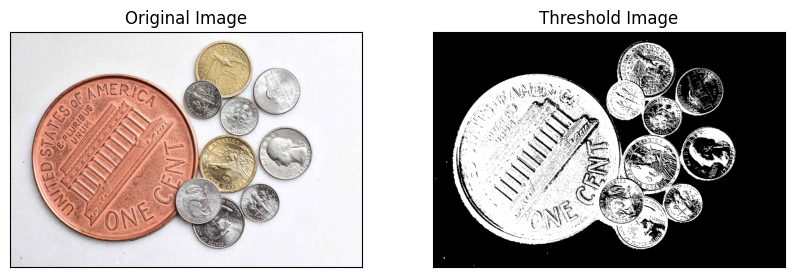

In [423]:
plt.figure(figsize=(10,10))

plt.subplot(121),plt.imshow(img[:,:,::-1], cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [424]:
# noise removal using gaussian blur
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
 
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=6)
 
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

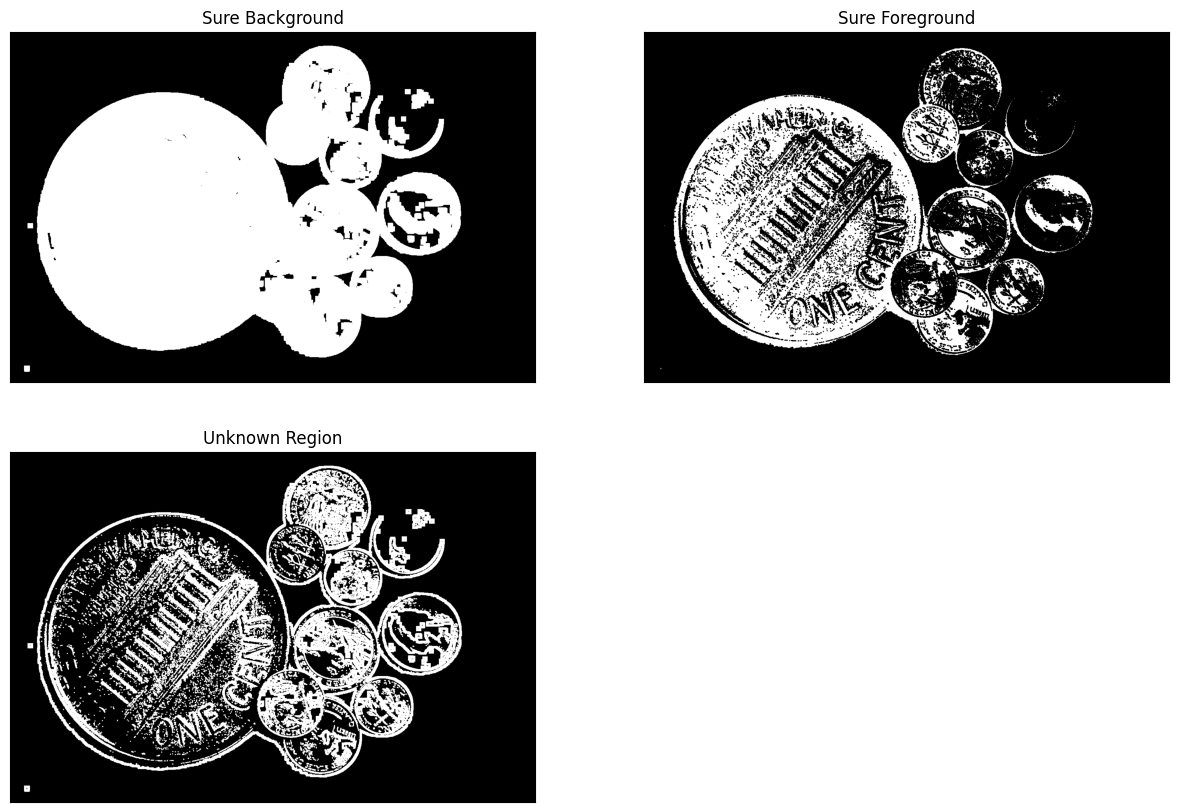

In [425]:
# Plotting the sure background area
plt.figure(figsize=(15,10))

plt.subplot(221),plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure Background'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure Foreground'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(unknown, cmap = 'gray')
plt.title('Unknown Region'), plt.xticks([]), plt.yticks([])
plt.show()

In [426]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

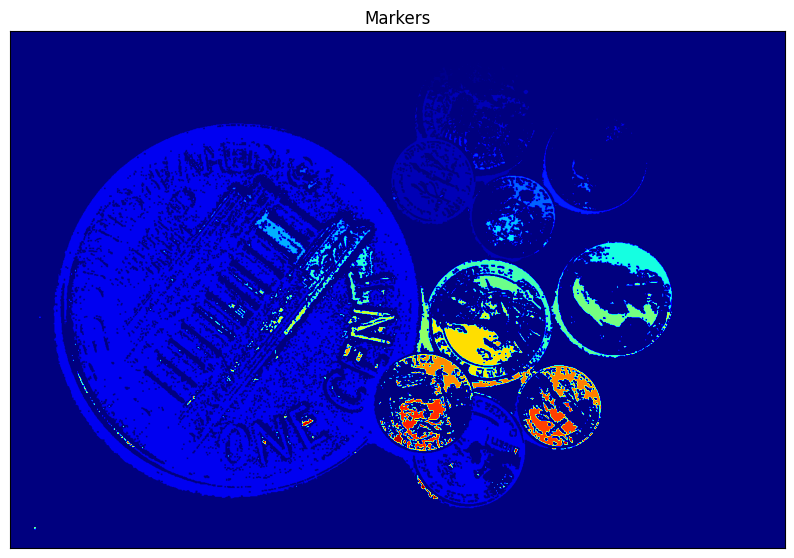

In [427]:
# Plotting the markers
plt.figure(figsize=(10,10))

plt.imshow(markers, cmap = 'jet')
plt.title('Markers'), plt.xticks([]), plt.yticks([])
plt.show()

markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

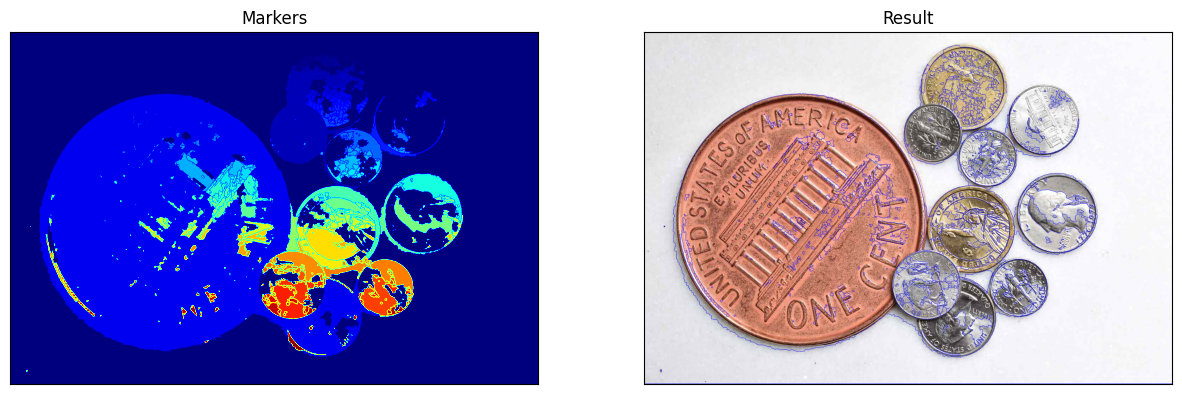

In [428]:
# Plotting the final image
plt.figure(figsize=(15,10))

plt.subplot(121),plt.imshow(markers, cmap = 'jet')
plt.title('Markers'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img[:,:,::-1])
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()

### Hough Transform

#### Solve 1

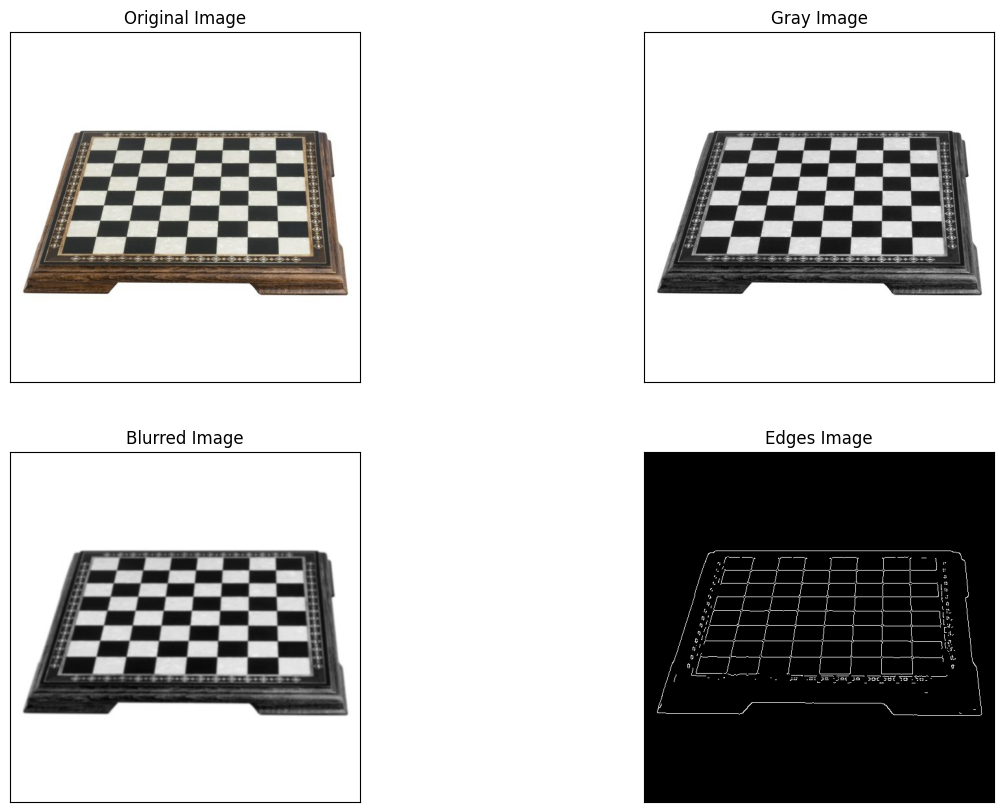

In [429]:
img = cv2.imread(cv2.samples.findFile('chess.jpg'))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
edges = cv2.Canny(blur,220,245,apertureSize = 3)

plt.figure(figsize=(15,10))

plt.subplot(221),plt.imshow(img[:,:,::-1], cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(gray, cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blur, cmap = 'gray')
plt.title('Blurred Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(edges, cmap = 'gray')
plt.title('Edges Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [430]:
lines = cv2.HoughLines(edges,3,np.pi/180,170)

In [431]:
lines

array([[[ 2.8950000e+02,  1.5707964e+00]],

       [[ 2.6550000e+02,  1.5707964e+00]],

       [[ 1.5150000e+02,  1.5707964e+00]],

       [[ 2.2050000e+02,  1.5707964e+00]],

       [[ 1.9950000e+02,  1.5707964e+00]],

       [[ 3.1350000e+02,  1.5707964e+00]],

       [[ 1.8150000e+02,  1.5707964e+00]],

       [[ 3.3750000e+02,  1.5882496e+00]],

       [[ 2.4450000e+02,  1.5707964e+00]],

       [[ 3.4350000e+02,  1.5707964e+00]],

       [[ 2.5950000e+02,  1.5882496e+00]],

       [[ 2.8350000e+02,  1.5882496e+00]],

       [[ 3.1050000e+02,  1.5882496e+00]],

       [[ 2.3850000e+02,  1.5882496e+00]],

       [[ 3.3450000e+02,  1.6057029e+00]],

       [[ 3.8550000e+02,  1.5707964e+00]],

       [[ 1.9650000e+02,  1.5882496e+00]],

       [[ 2.2650000e+02,  1.5533431e+00]],

       [[ 2.1750000e+02,  1.5882496e+00]],

       [[ 1.8450000e+02,  1.5533431e+00]],

       [[ 3.1950000e+02,  1.5533431e+00]],

       [[ 2.0550000e+02,  1.5533431e+00]],

       [[ 3.7050000e+02,  1.7453

In [432]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

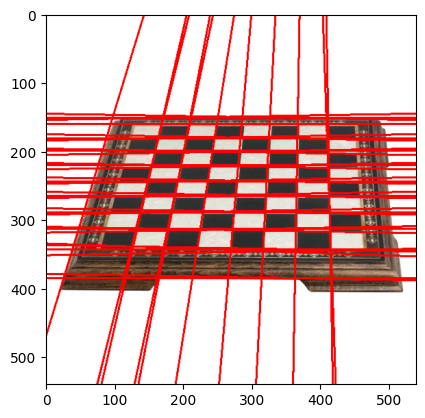

In [433]:
plt.imshow(img[:,:,::-1])

#### Solve 2

In [434]:
img = cv2.imread(cv2.samples.findFile('chess.jpg'))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
 
cv2.imwrite('houghlines5.jpg',img)

True

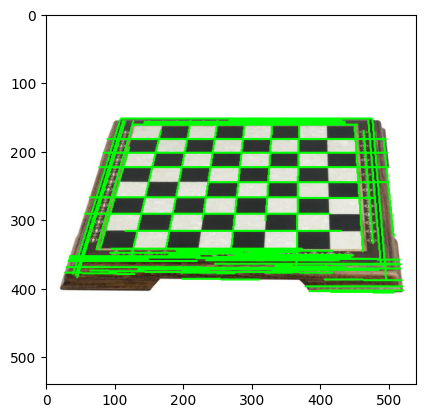

In [435]:
plt.imshow(img[:,:,::-1])